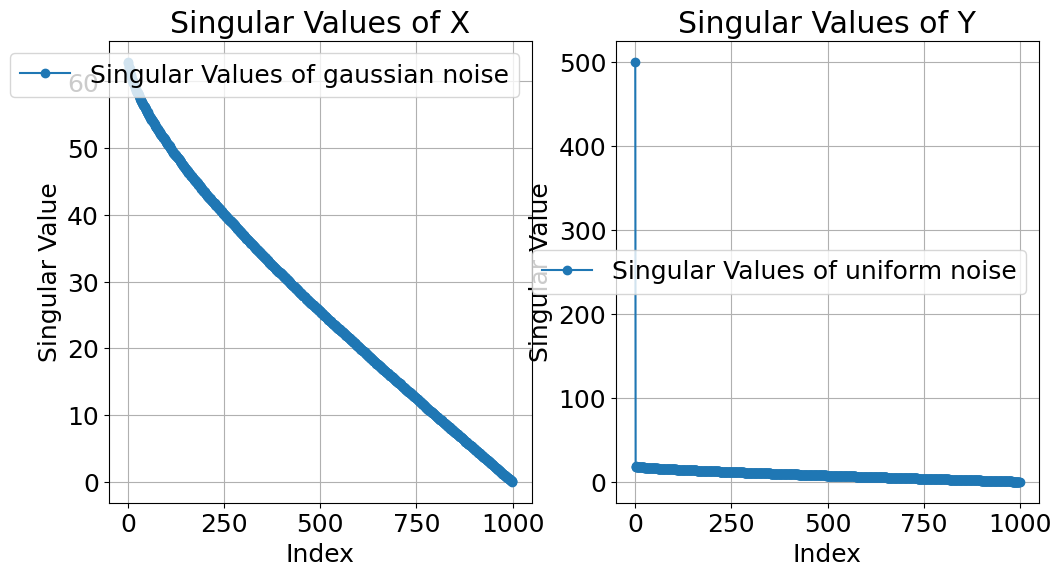

In [41]:
import matplotlib.pyplot as plt
import numpy as np

nPoints = 1000
Xnoise = np.random.randn(nPoints, nPoints)
Y = np.random.uniform(0, 1, (nPoints, nPoints))


Ux, Sx, Vxt = np.linalg.svd(Xnoise)
Uy, Sy, Vyt = np.linalg.svd(Y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(Sx, 'o-', label='Singular Values of gaussian noise')
plt.title('Singular Values of X')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Sy, 'o-', label='Singular Values of uniform noise')
plt.title('Singular Values of Y')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid()
plt.legend()

plt.show()


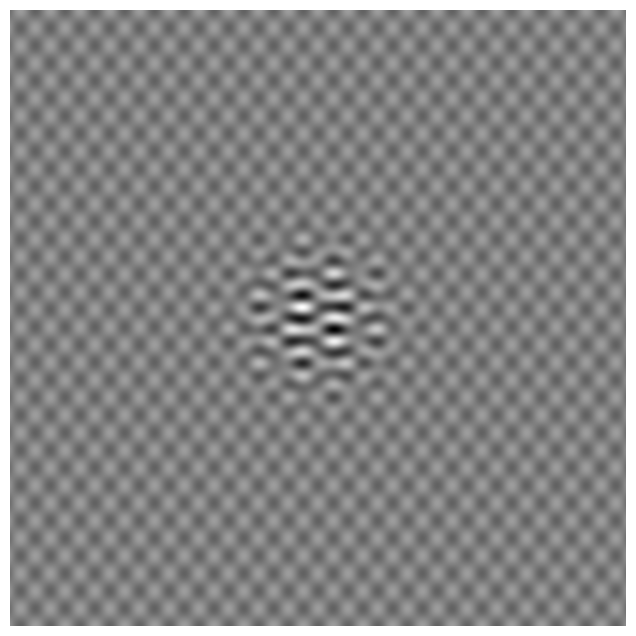

In [38]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

t = np.arange(-5,5,0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()


In [39]:
gamma_values = np.arange(1, 3.5, 0.5)
Xnoisy_dict = {}

for gamma in gamma_values:
    Xnoisy_dict[gamma] = X + gamma * Xnoise


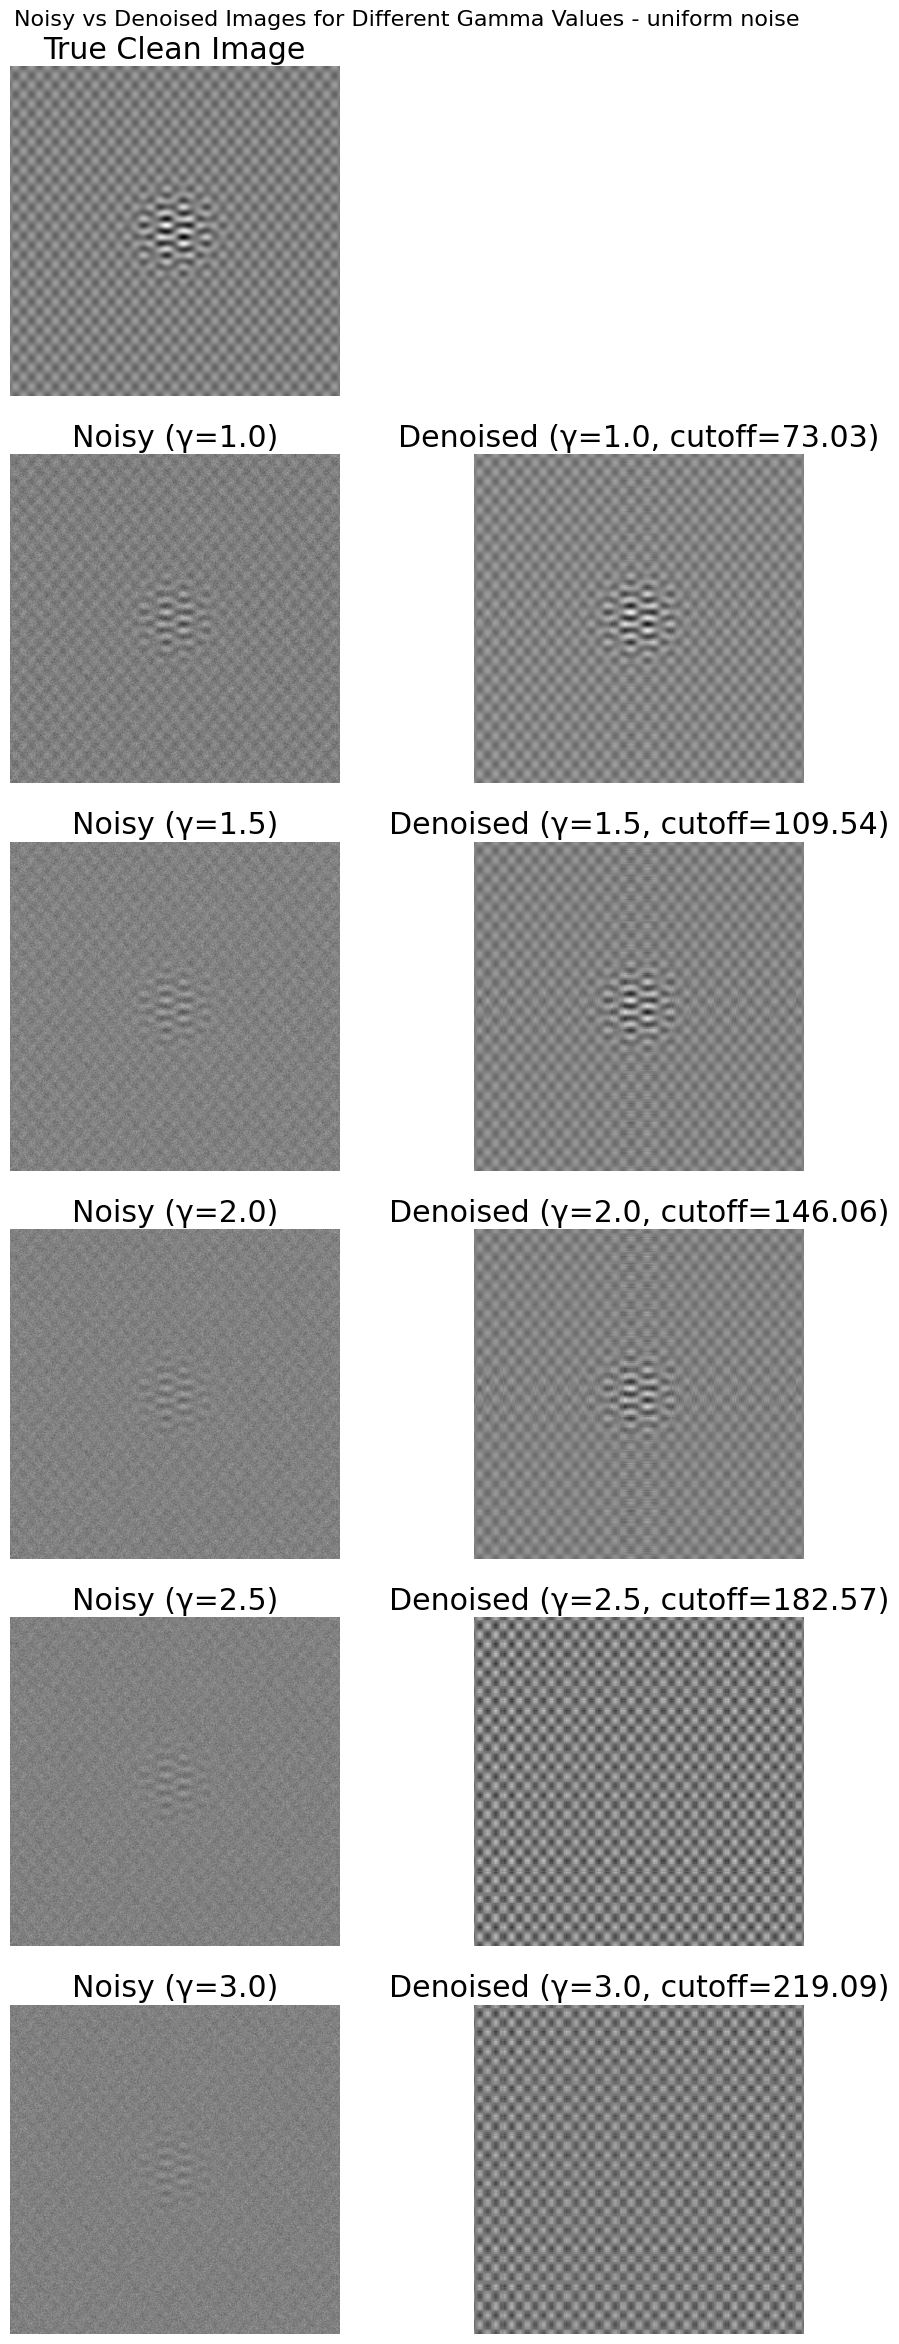

In [40]:
N = X.shape[0]
num_gammas = len(gamma_values)

# Create figure with subplots: 1 for Xclean + 2 subplots per gamma (noisy and clean)
fig, axes = plt.subplots(num_gammas + 1, 2, figsize=(10, 4 * (num_gammas + 1)))
fig.suptitle('Noisy vs Denoised Images for Different Gamma Values - uniform noise', fontsize=16)

# Plot clean image
axes[0, 0].imshow(X, cmap='gray')
axes[0, 0].set_title('True Clean Image')
axes[0, 0].axis('off')
axes[0, 1].axis('off')

# Process each gamma value
for idx, gamma in enumerate(gamma_values):
    Xnoisy = Xnoisy_dict[gamma]
    
    # Plot noisy image
    axes[idx + 1, 0].imshow(Xnoisy, cmap='gray')
    axes[idx + 1, 0].set_title(f'Noisy (γ={gamma})')
    axes[idx + 1, 0].axis('off')
    
    # Denoise
    U, S, VT = np.linalg.svd(Xnoisy, full_matrices=0)
    cutoff = (4 / np.sqrt(3)) * np.sqrt(N) * gamma
    r = np.max(np.where(S > cutoff))
    Xclean = U[:, :(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1), :]
    
    # Plot denoised image
    axes[idx + 1, 1].imshow(Xclean, cmap='gray')
    axes[idx + 1, 1].set_title(f'Denoised (γ={gamma}, cutoff={cutoff:.2f})')
    axes[idx + 1, 1].axis('off')

plt.tight_layout()
plt.show()
